## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate


In [2]:
jet = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)

jet_histogram = cv2.calcHist([jet], [0], None, [256], [0, 256])
jet_mean = np.round(np.mean(jet)).astype('uint8')

jet_histogram_1 = jet_histogram[0:jet_mean]
jet_histogram_2 = jet_histogram[jet_mean:]

C1 = jet_histogram_1.cumsum()/np.max(jet_histogram_1)
C2 = jet_histogram_2.cumsum()/np.max(jet_histogram_2)

C1_N = C1 * jet_mean
C2_N = jet_mean + 1 + (255 - jet_mean - 1) * C2

C1_NN = cv2.normalize(C1_N, None, 0, jet_mean, cv2.NORM_MINMAX)
C2_NN = cv2.normalize(C2_N, None, jet_mean, 255, cv2.NORM_MINMAX)

C = np.append(C1_NN, C2_NN)

jet_LUT = cv2.LUT(jet, C)
jet_LUT_histogram = cv2.calcHist(jet_LUT, [0], None, [256], [0, 256])

jet_eq = cv2.equalizeHist(jet)
jet_eq_histogram = cv2.calcHist(jet_eq, [0], None, [256], [0, 256])

Text(0.5, 1.0, 'Histogram')

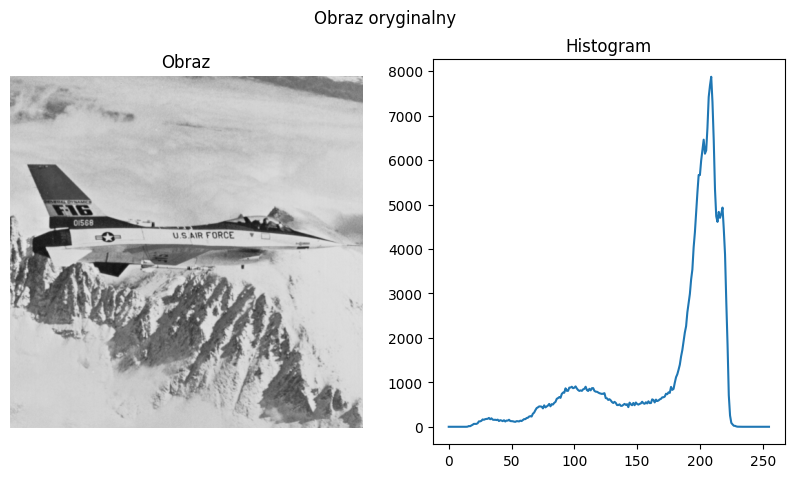

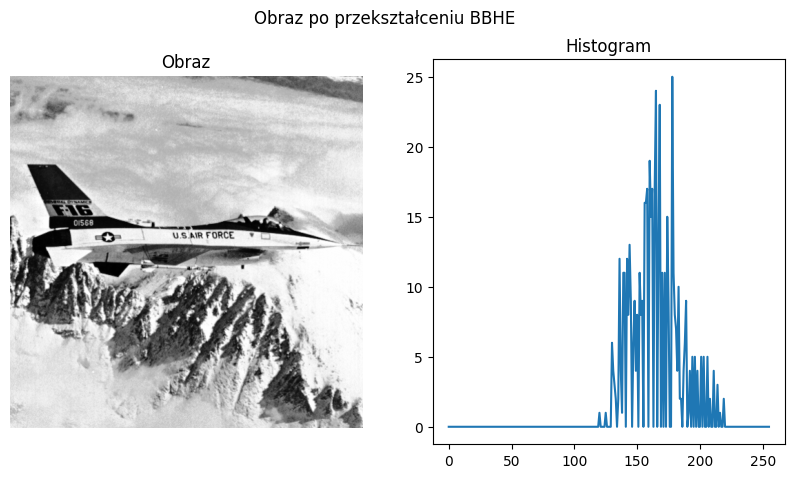

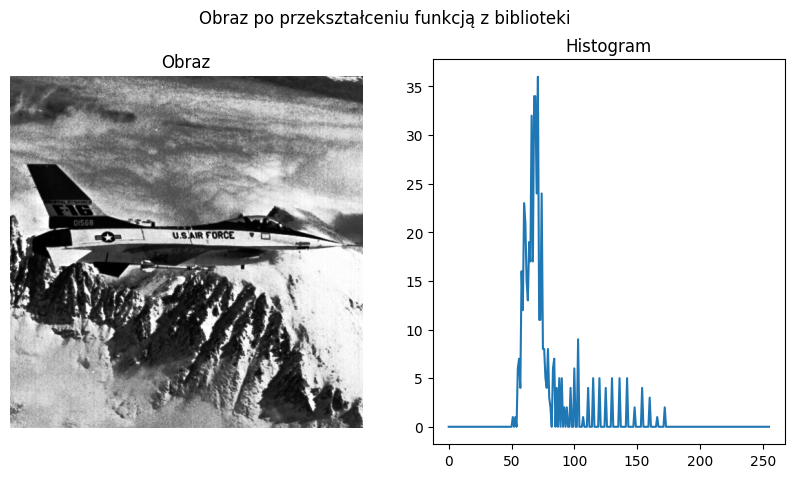

In [3]:
fig1, (im, hist) = plt.subplots(1, 2, figsize=(10, 5))
fig1.suptitle('Obraz oryginalny')
im.imshow(jet, 'gray', vmin=0, vmax=256)
im.set_axis_off()
im.set_title('Obraz')
hist.plot(jet_histogram)
hist.set_title('Histogram')

fig2, (im, hist) = plt.subplots(1, 2, figsize=(10, 5))
fig2.suptitle('Obraz po przekształceniu BBHE')
im.imshow(jet_LUT, 'gray', vmin=0, vmax=256)
im.set_axis_off()
im.set_title('Obraz')
hist.plot(jet_LUT_histogram)
hist.set_title('Histogram')

fig3, (im, hist) = plt.subplots(1, 2, figsize=(10, 5))
fig3.suptitle('Obraz po przekształceniu funkcją z biblioteki')
im.imshow(jet_eq, 'gray', vmin=0, vmax=256)
im.set_axis_off()
im.set_title('Obraz')
hist.plot(jet_eq_histogram)
hist.set_title('Histogram')